In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# columns = inspect.get_columns('station')
# for c in columns:
#     print(c['name'], c["type"])

In [11]:
prep = list(session.query(Measurement.prcp).all())

# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from today
year_ago = dt.date.today() - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
dates = session.query(Measurement.date)\
        .filter((Measurement.date > '2016-08-23') & \
                (Measurement.date < '2017-08-23')).all()
precipitate = session.query(Measurement.prcp)\
            .filter((Measurement.date > '2016-08-23') & (Measurement.date < '2017-08-23')).all()
dates

# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame({
    'Date':dates,
    'Precipitation':precipitate
})

df = df.set_index('Date')

# Sort the dataframe by date
df = df.sort_values('Date', ascending=True)

df.head()

# Use Pandas Plotting with Matplotlib to plot the data


# Rotate the xticks for the dates


,Precipitation
Date,
"(2016-08-24,)","(0.08,)"
"(2016-08-24,)","(None,)"
"(2016-08-24,)","(2.15,)"
"(2016-08-24,)","(2.28,)"
"(2016-08-24,)","(2.15,)"


<IPython.core.display.Javascript object>


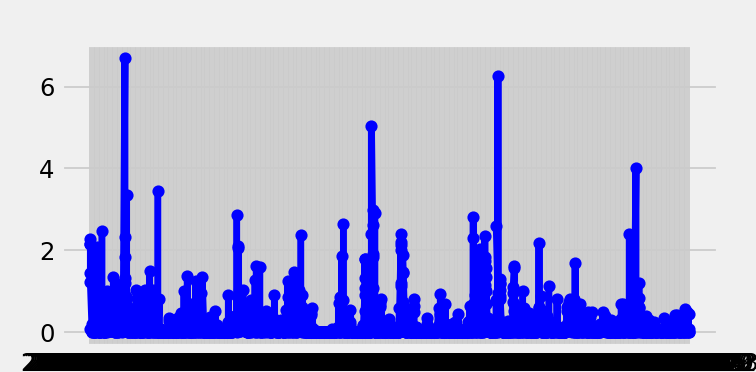

In [19]:
dates_2 = [r.date for r in session.query(Measurement.date).filter(Measurement.date > '2016-08-23').all()]
precip = [r.prcp for r in session.query(Measurement.prcp).filter(Measurement.date > '2016-08-23').all()]

df2 = pd.DataFrame({
    'Date':dates_2,
    'Precipitation':precip
})

df2 = df2.sort_values('Date', ascending=True)


plt.plot(df2['Date'],df2['Precipitation'],marker ='o', color='blue', label="Prcp")
plt.xlabel('date')

plt.show()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df2.describe()


,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()


[(9)]

In [16]:
# What are the most active stations?
# List the stations and the counts in descending order.

session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).\
        order_by(desc(func.count(Measurement.station))).\
        all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                filter(Measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

In [20]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


<IPython.core.display.Javascript object>


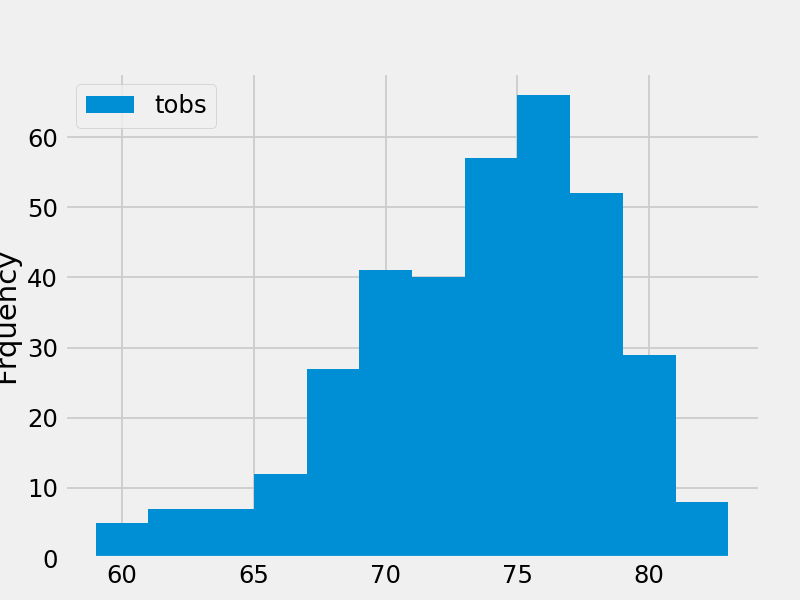

<IPython.core.display.Javascript object>


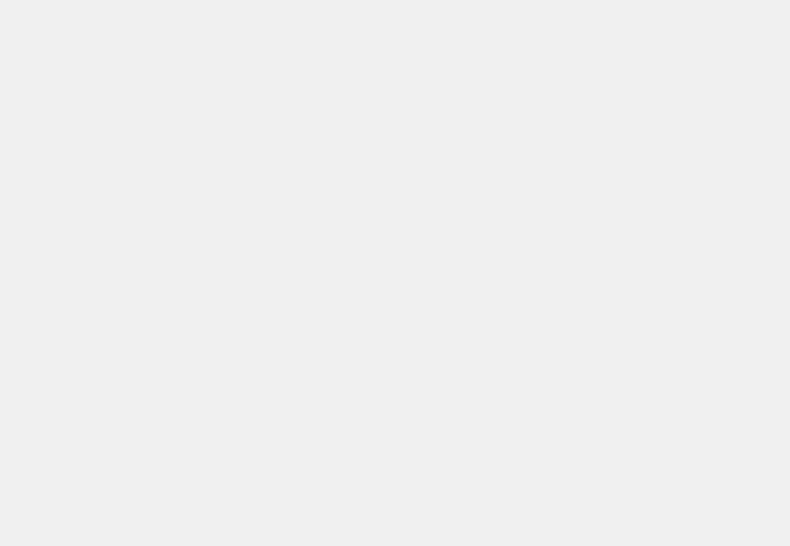

In [21]:
toobie = [r.tobs for r in session.query(Measurement.tobs)\
          .filter((Measurement.station == 'USC00519281') & (Measurement.date > '2016-08-23')).all()]
plt.hist(toobie, bins=12, label='tobs')
plt.ylabel('Frquency')
plt.legend(loc=2)
plt.figure(figsize=(10,5))
plt.show()

Optional Excercise

In [22]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [23]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [24]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [25]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [26]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [27]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [28]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [29]:
# Plot the daily normals as an area plot with `stacked=False`


Step 2 - Climate App

Now that you have completed your initial analysis, design a Flask API based on the queries that you have just developed.


*Use FLASK to create your routes.


Routes


*/api/v1.0/precipitation


*Query for the dates and temperature observations from the last year.
*Convert the query results to a Dictionary using date as the key and tobs as the value.
*Return the JSON representation of your dictionary.


*/api/v1.0/stations

*Return a JSON list of stations from the dataset.

*/api/v1.0/tobs


Return a JSON list of Temperature Observations (tobs) for the previous year.

*/api/v1.0/<start> and /api/v1.0/<start>/<end>

*Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.
*When given the start only, calculate TMIN, TAVG, and TMAX for all dates greater than and equal to the start date.
*When given the start and the end date, calculate the TMIN, TAVG, and TMAX for dates between the start and end date inclusive.

In [30]:
from flask import Flask, jsonify

In [31]:
#create query for /api/v1.0/precipitation
all_temp = session.query(Measurement.date,Measurement.tobs).filter(Measurement.date > '2016-08-23').all()

df = pd.DataFrame(all_temp)
df = df.set_index("date")
dict_df = df.to_dict()["tobs"]

In [32]:
#create query for stations api
stations_query = session.query(Station.id,Station.station,Station.name, Station.latitude, Station.longitude,Station.elevation).all()

In [33]:
active_stations = session.query(Measurement.station,
                                func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

#List the stations and obsevation counts in descending order
#print(active_stations)

#Design a query to retrieve the last 12 months of temperature observation data (tobs) for the most active station
active_tobs = session.query(Measurement.station,Measurement.date,Measurement.tobs).filter(Measurement.date> '2016-08-23',Measurement.station==active_stations[0][0]).order_by(Measurement.tobs).all()

In [34]:
app = Flask(__name__)


In [35]:
@app.route("/")
def hello():
    print("Server received request for 'Home' page...")
    return "<h1>Welcome to Climate App</h1> </br>" + \
            "/api/v1.0/precipitation returns temperature observations from the past year</br>" + \
            "/api/v1.0/stations returns a json list of stations</br>" + \
            "/api/v1.0/tobs returns a json list of temperature observations from the last year</br>" + \
            "/api/v1.0/&ltstart&gt and /api/v1.0/&ltstart&gt/&ltend&gt returns a json list of min, avg, and max temp - given start or start-end range"

In [36]:
@app.route("/api/v1.0/precipitation")
def precipitation():
    print("Server received request for 'Precipitation' page...")
    return jsonify(dict_df)

In [37]:
@app.route("/api/v1.0/stations")
def stations():
    print("Server received request for 'Stations' page...")
    return jsonify(stations_query)

In [38]:
@app.route("/api/v1.0/tobs")
def tobs():
    print("Server received request for 'Temperature Observations (tobs)' page...")
    return jsonify(active_tobs)

In [39]:
@app.route("/api/v1.0/<start>")
def temp(start):
    print("Server received request for dynamic temperature page with only start...")
    try: 
        start = dt.datetime.strptime(start,"%y-%m-%d")
        end = date.today()
        

        prior_start = s_date-dt.timedelta(365)
        prior_end = e_date-dt.timedelta(365)
        
        print("Searching for weather data from " + str(prior_start) + " to " + str(prior_end))
        
        weather_data = session.query(Measurement.date,func.avg(Measurement.tobs)).filter(Measurement.date>=prior_start,Measurement.date<=prior_end).group_by(Measurement.date).all()
        
        df_weather = pd.DataFrame(data=weather_data,columns=["date","temp"])
        min_temp = df_weather["temp"].min()
        max_temp = df_weather["temp"].max()
        mean_temp = df_weather["temp"].mean()
        
        print("min_temp, mean_temp, and max_temp are returned")
        return jsonify({'TMIN': min_temp}, {'TAVG': mean_temp}, {'TMAX': max_temp})
        
    except:
        print("input date is not in correct format. Dates should be formated as %y-%d-%y")
    return jsonify(temp_summary)

In [40]:
@app.route("/api/v1.0/<start>/<end>")
def temp_2(start,end):
    print("Server received request for dynamic temperature page with start and end...")
    try: 
        start = dt.datetime.strptime(start,"%y-%m-%d")
        end = dt.datetime.strptime(end,"%y-%m-%d")
        
        prior_start = s_date-dt.timedelta(365)
        prior_end = e_date-dt.timedelta(365)
        
        print("Searching for weather data from " + str(prior_start) + " to " + str(prior_end))
        
        weather_data = session.query(Measurement.date,func.avg(Measurement.tobs)).filter(Measurement.date>=prior_start,Measurement.date<=prior_end).group_by(Measurement.date).all()
        
        df_weather = pd.DataFrame(data=weather_data,columns=["date","temp"])
        min_temp = df_weather["temp"].min()
        max_temp = df_weather["temp"].max()
        mean_temp = df_weather["temp"].mean()
        
        print("min_temp, mean_temp, and max_temp are returned")
        return jsonify({'TMIN':min_temp}, {'TAVG':mean_temp}, {'TMAX':max_temp})
        
    except:
        print("input dates are not in correct format. Dates should be formated as %y-%d-%y")

NameError: name 'breaker' is not defined

In [ ]:
if __name__ == "__main__":
    app.run(debug=False)